# Housing Data Analysis 🏠

This notebook explores housing data to understand the factors influencing housing prices in California. We'll perform data cleaning, exploration, and modeling using linear regression.

## 1. Importing Required Libraries

## 2. Loading the Dataset

## 3. Exploring the Dataset

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [172]:
df = pd.read_csv("housing.csv")

In [173]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [177]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [179]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## 4. Handling Missing Values

In [180]:
missing_value = df.isnull().sum()
missing_percentage = (missing_value / len(df)) * 100
missing_value 
missing_percentage

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [181]:
df = df.dropna().copy()

In [182]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 5. Statistical Summary

In [184]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 6. Data Visualization

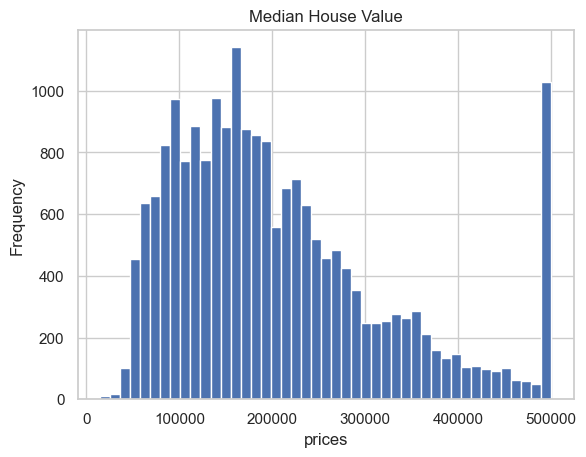

In [185]:
ax = df['median_house_value'].plot(kind = 'hist', 
                         bins = 45,
                         title = 'Median House Value')
ax.set_xlabel('prices')
plt.show()

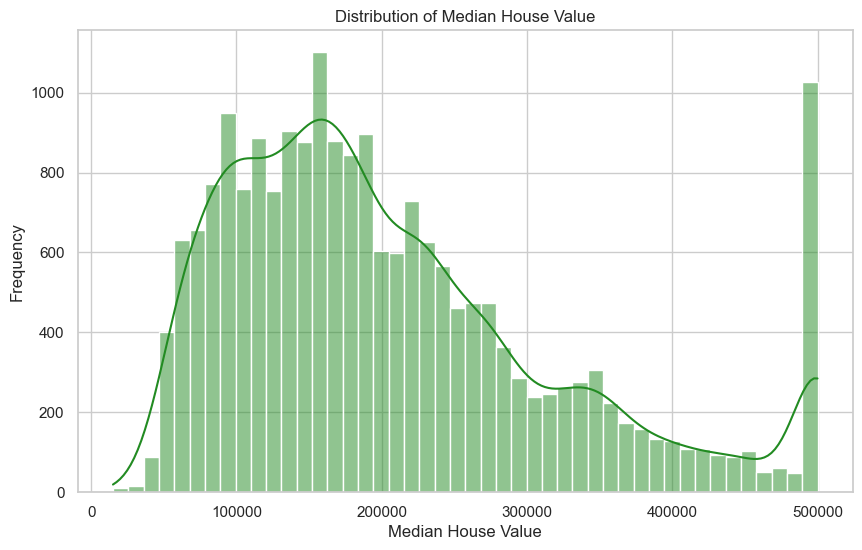

In [188]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
sns.histplot(df["median_house_value"], color = 'forestgreen', kde = True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

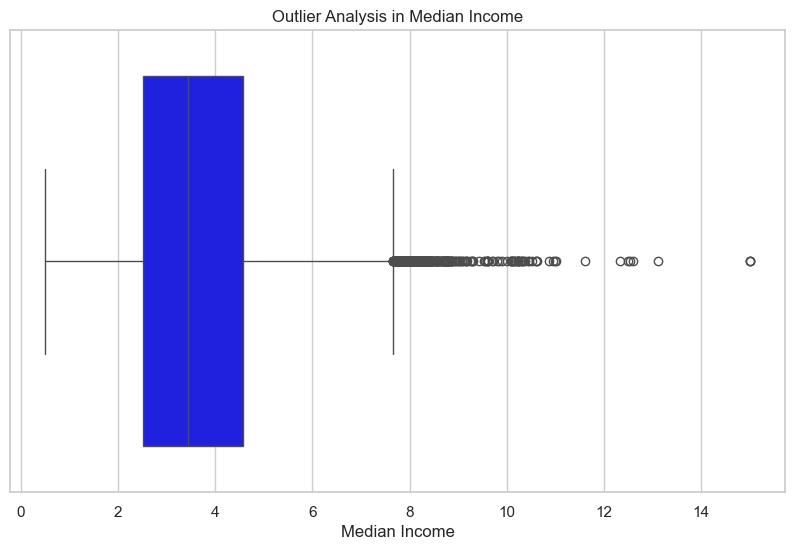

In [189]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df1['median_income'], color = 'blue')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

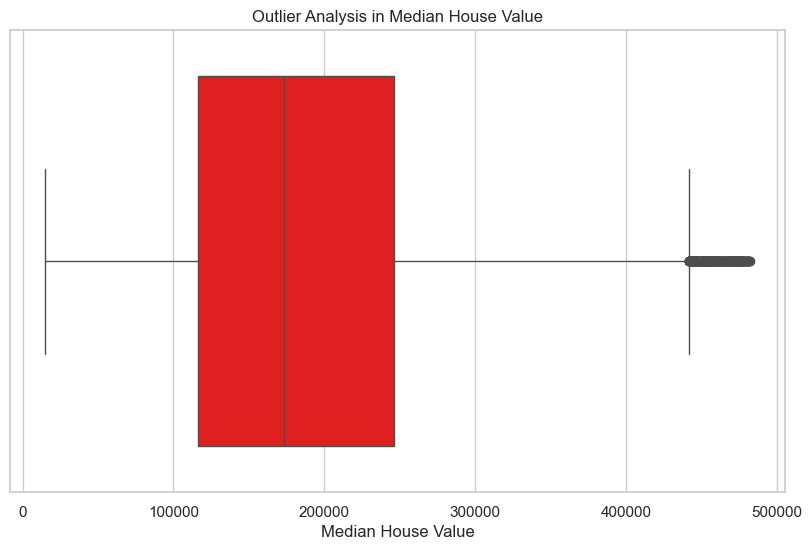

In [190]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df1['median_house_value'], color = 'red')
plt.title('Outlier Analysis in Median House Value')
plt.xlabel('Median House Value')
plt.show()

# 7. Handling Outliers

In [196]:
# Define inter quartile range
Q1 = df["median_house_value"].quantile(0.25)
Q3 = df["median_house_value"].quantile(0.75)
IQR = Q3 - Q1

#Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df1 = df[(df["median_house_value"] >= lower_bound) & (df["median_house_value"] <= upper_bound)]


In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19369 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19369 non-null  float64
 1   latitude            19369 non-null  float64
 2   housing_median_age  19369 non-null  float64
 3   total_rooms         19369 non-null  float64
 4   total_bedrooms      19369 non-null  float64
 5   population          19369 non-null  float64
 6   households          19369 non-null  float64
 7   median_income       19369 non-null  float64
 8   median_house_value  19369 non-null  float64
 9   ocean_proximity     19369 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [198]:
# Define inter quartile range
Q1 = df1["median_income"].quantile(0.25)
Q3 = df1["median_income"].quantile(0.75)
IQR = Q3 - Q1

#Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df2 = df1[(df1["median_income"] >= lower_bound) & (df1["median_income"] <= upper_bound)]

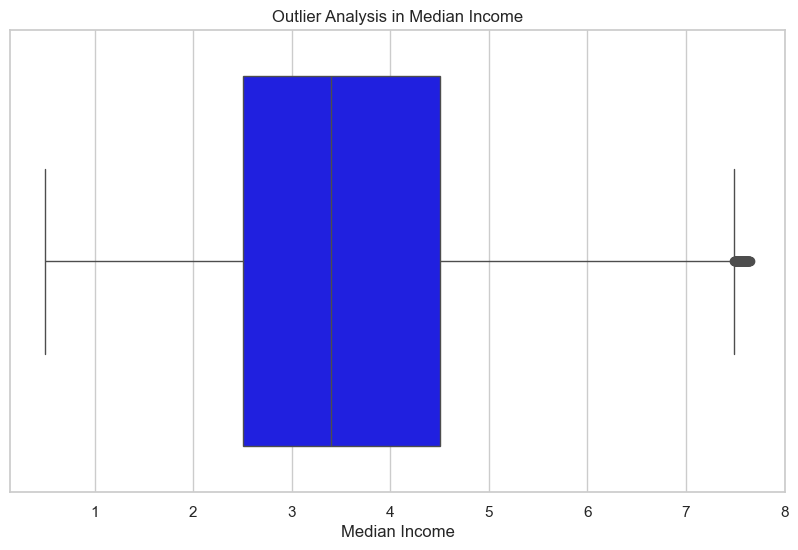

In [199]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df2['median_income'], color = 'blue')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [201]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19026 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19026 non-null  float64
 1   latitude            19026 non-null  float64
 2   housing_median_age  19026 non-null  float64
 3   total_rooms         19026 non-null  float64
 4   total_bedrooms      19026 non-null  float64
 5   population          19026 non-null  float64
 6   households          19026 non-null  float64
 7   median_income       19026 non-null  float64
 8   median_house_value  19026 non-null  float64
 9   ocean_proximity     19026 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 8. Exploring the cleaned dataset
Checking the characteristics of the cleaned dataset 

In [202]:
data = df2

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19026 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19026 non-null  float64
 1   latitude            19026 non-null  float64
 2   housing_median_age  19026 non-null  float64
 3   total_rooms         19026 non-null  float64
 4   total_bedrooms      19026 non-null  float64
 5   population          19026 non-null  float64
 6   households          19026 non-null  float64
 7   median_income       19026 non-null  float64
 8   median_house_value  19026 non-null  float64
 9   ocean_proximity     19026 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Correlation Heatmap

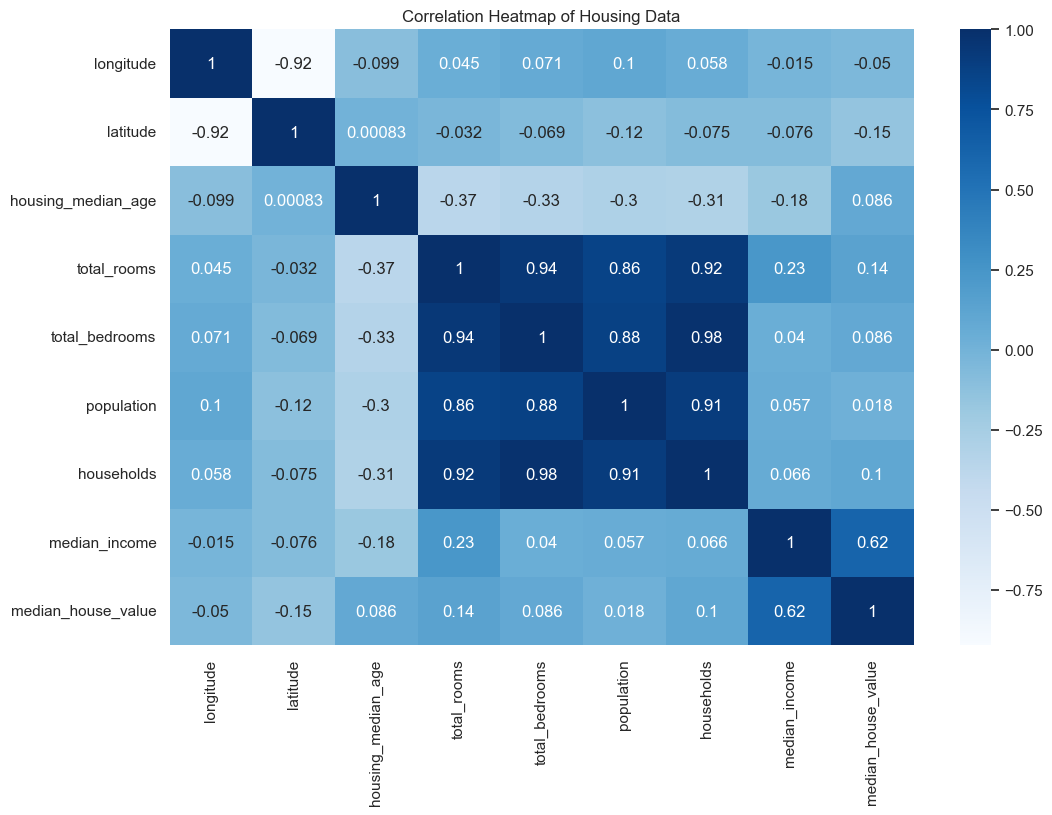

In [204]:
plt.figure(figsize = (12,8))
sns.heatmap (data.corr(numeric_only = True), annot = True, cmap = "Blues")
plt.title ('Correlation Heatmap of Housing Data')
plt.show()

In [205]:
# Dropping total bedroom because of its high correlation
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [206]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8246
INLAND        6404
NEAR OCEAN    2365
NEAR BAY      2006
ISLAND           5
Name: count, dtype: int64

# 9. String Data Categorization to Dummy Variables

In [207]:
ocean_proximity_dummies = pd.get_dummies(data["ocean_proximity"], prefix = "ocean_proximity")
ocean_proximity_dummies = ocean_proximity_dummies.astype(int)
data = pd.concat([data.drop("ocean_proximity", axis = 1), ocean_proximity_dummies], axis = 1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [208]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [209]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


# 10. Splitting the Data into Train/Test


In [210]:
# Defination of dependent and independent variables
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
        'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data[features]
y = data[target]

# Split the data into a training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1111)



In [211]:
#check the size of the splits
print(f'Training set size : {X_train.shape[0]} samples')
print(f'Test set size : {X_test.shape[0]} samples')

Training set size : 15220 samples
Test set size : 3806 samples


# 11.Regression Model

In [212]:
#Add constant to the predictors 
X_train_const = sm.add_constant(X_train)

# Fitting the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

model_fitted.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:56:44   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.747e+06   9.16e+04    -19.073      0.000   -1.93e+06   -1.57e+06
longitude                  -2.268e+04    997.843    -22.728      0.000   -2.46e+04   -2.07e+04
latitude                   -2.109e+04    981.562    -21.490      0.000    -2.3e+04   -1.92e+04
housing_median_age           846.4636     44.561     18.996      0.000     759.118     933.809
total_rooms                   -2.6698      0.716     -3.728      0.000      -4.073      -1.266
population                   -33.1937      1.050    -31.620      0.000     -35.251     -31.136
households                   124.3609      4.388     28.343      0.000     115.761     132.961
median_income               3.562e+04    424.453     83.928      0.000    3.48e+04    3.65e+04
ocean_proximity_<1H OCEAN    -1.7e+05   2.95e+04     -5.755      0.000   -2.28e+05   -1.12e+05
ocean_proximity_INLAND     -2.108e+05   2.96e+04     -7.123      0.000   -2.69e+05   -1.53e+05
ocean_proximity_NEAR BAY   -1.779e+05   2.96e+04     -6.015      0.000   -2.36e+05    -1.2e+05
ocean_proximity_NEAR OCEAN -1.689e+05   2.95e+04     -5.716      0.000   -2.27e+05   -1.11e+05
==============================================================================
Omnibus:                     3434.427   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10645.381
Skew:                           1.157   Prob(JB):                         0.00
Kurtosis:                       6.381   Cond. No.                     7.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


## 📈 Linear Regression Summary

In this regression, the dependent variable is **mean house value**. The goal is to identify which features significantly influence housing prices in California.

### 🔍 Key Findings

- **Latitude & Longitude**: Both have large **negative coefficients**, indicating that homes located further west and south tend to have lower prices.
- **Median Income**: This is the **most influential positive predictor**. For each additional unit increase in median income, the mean house value increases by approximately **$35,620**.
- **Housing Median Age**: Slightly increases home value — older homes tend to be in more established (and possibly more desirable) neighborhoods.
- **Households**: Positively correlated — more households in a block group is associated with higher house prices.
- **Population**: Has a **negative** impact on housing price. This could suggest overcrowded or high-density areas are less desirable.
- **Total Rooms**: Also shows a slight **negative coefficient**, which may seem counterintuitive. This could be due to multicollinearity with other variables like population or households.

### 🌊 Ocean Proximity (Categorical Variables)

These are dummy variables comparing each location type to a **baseline category** (likely `'ISLAND'` or another that was omitted):

- `ocean_proximity_<1H OCEAN`: About **$117,000 less** than the baseline.
  
- `ocean_proximity_INLAND`: About **$210,800 less**.

  
- `ocean_proximity_NEAR BAY`: About **$177,900 less**.

  
- `ocean_proximity_NEAR OCEAN`: About **$168,900 less**.

This suggests that the **baseline ocean category** (not shown) includes high-value properties that drive up its average — possibly luxury or rare coastal zones.

### 📊 Model Significance

All features have **very low p-values (0.000)**, meaning they are **statistically significant** in predicting house value. The 95% confidence intervals for all variables do not include zero, further confirming their influence.


In [213]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test sets
test_predictions = model_fitted.predict(X_test_const)
test_predictions 

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

# 12. TESTING THE ASSUMPTIONS OF OLS


Linearity Test


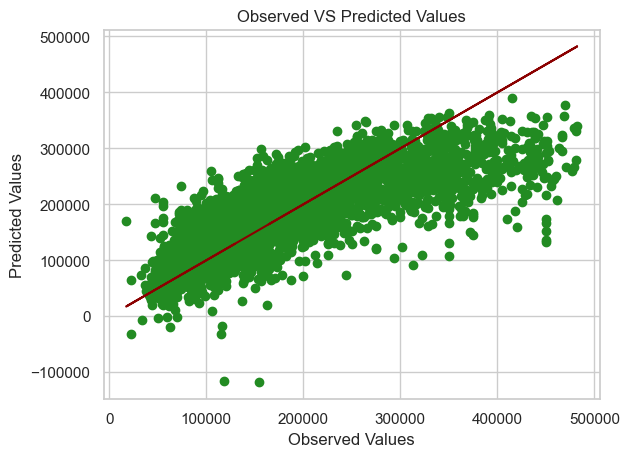

In [214]:
# Scatterplots for observed vs predicted values on test data
plt.scatter(y_test, test_predictions , color = "forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed VS Predicted Values")
plt.plot(y_test, y_test, color = "darkred") #line for perfect predicttion
plt.show()

Random Sample


In [215]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f'the mean of the residual is {(np.round(mean_residuals, 2))}')

the mean of the residual is -0.0


Exogeneity


In [216]:
# Calculate the residuals
residuals = model_fitted.resid
# Check for correlation between residuals and each predictors 
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals) [0, 1]
    print(f'Correlation between residuals and {column} : {np.round(corr_coefficient, 2)} ')

Correlation between residuals and longitude : -0.0 
Correlation between residuals and latitude : 0.0 
Correlation between residuals and housing_median_age : -0.0 
Correlation between residuals and total_rooms : -0.0 
Correlation between residuals and population : -0.0 
Correlation between residuals and households : -0.0 
Correlation between residuals and median_income : 0.0 
Correlation between residuals and ocean_proximity_<1H OCEAN : -0.0 
Correlation between residuals and ocean_proximity_INLAND : 0.0 
Correlation between residuals and ocean_proximity_NEAR BAY : -0.0 
Correlation between residuals and ocean_proximity_NEAR OCEAN : -0.0 


Homoskedasticity


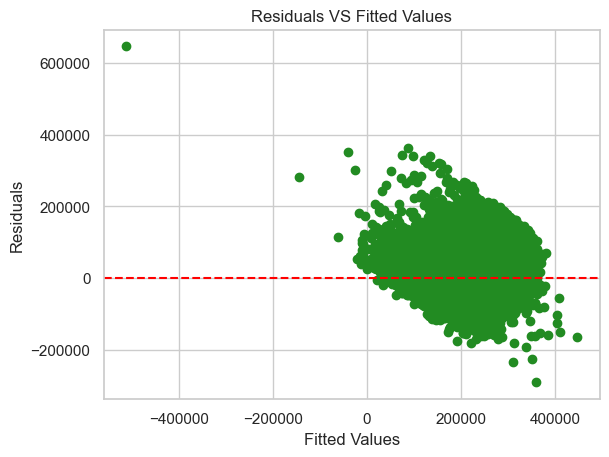

In [217]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals VS Fitted Values")
plt.show()

# 13. TRAIN TEST AND EVALUATION

In [218]:
from sklearn.preprocessing import StandardScaler
# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it 
X_train_scaled = scaler.fit_transform(X_train)

#Apply the same transformation to the test data 
X_test_scaled = scaler.transform(X_test)

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate the MSE and RMSE
mse = mean_squared_error (y_test, y_pred)
rmse = sqrt(mse)


print (f"The MSE is {mse}")
print (f"The RMSE is {rmse} ")

The MSE is 3529059611.5734305
The RMSE is 59405.88869441674 
